<h3>This script corresponds to the "Contribution of different feature groups" section in our manuscript.</h3>

In [1]:
import re, os, sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

<h4>Load the False positive rate (fpr) and True positive rate (tpr) predicted by each feature group on the test set separately. These data are obtained by modeling each group of features and then predicting the test set. </h4>

In [2]:
##all features
allfpr = []
alltpr = []
with open("../Contribution of different feature groups/all_fpr_tpr",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        fpr = float(li[0])
        tpr = float(li[-1])
        allfpr.append(fpr)
        alltpr.append(tpr)
        
        
AUC_all = metrics.auc(np.array(allfpr),np.array(alltpr))

##transcription factor binding features
TFfpr = []
TFtpr = []
with open("../Contribution of different feature groups/TF_fpr_tpr",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        fpr = float(li[0])
        tpr = float(li[-1])
        TFfpr.append(fpr)
        TFtpr.append(tpr)
AUC_TF = metrics.auc(np.array(TFfpr),np.array(TFtpr))

##Open chromatin features
openChromfpr = []
openChromtpr = []
with open("../Contribution of different feature groups/openChromatin_fpr_tpr",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        fpr = float(li[0])
        tpr = float(li[-1])
        openChromfpr.append(fpr)
        openChromtpr.append(tpr)
AUC_openChrom = metrics.auc(np.array(openChromfpr),np.array(openChromtpr))

##Histone modification features
histoneMofpr = []
histoneMotpr = []
with open("../Contribution of different feature groups/histoneModification_fpr_tpr",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        fpr = float(li[0])
        tpr = float(li[-1])
        histoneMofpr.append(fpr)
        histoneMotpr.append(tpr)
AUC_histone = metrics.auc(np.array(histoneMofpr),np.array(histoneMotpr))

#Evolutionary conservation features
conservationfpr = []
conservationtpr = []
with open("../Contribution of different feature groups/evolutionaryConservation_fpr_tpr",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        fpr = float(li[0])
        tpr = float(li[-1])
        conservationfpr.append(fpr)
        conservationtpr.append(tpr)
AUC_cons = metrics.auc(np.array(conservationfpr),np.array(conservationtpr))

##Other genomics features
otherfpr = []
othertpr = []
with open("../Contribution of different feature groups/otherGenomic_fpr_tpr",'rt') as f:
    for line in f:
        line = line.strip()
        li = re.split("\s+",line)
        fpr = float(li[0])
        tpr = float(li[-1])
        otherfpr.append(fpr)
        othertpr.append(tpr)
AUC_other = metrics.auc(np.array(otherfpr),np.array(othertpr))

<h4>ROC curve showing performance of the five feature groups in Model 3: open chromatin, transcription factor binding, histone modification, evolutionary conservation, and other genomic features. The AUC of the test set was used as the metric to measure the importance.</h4>

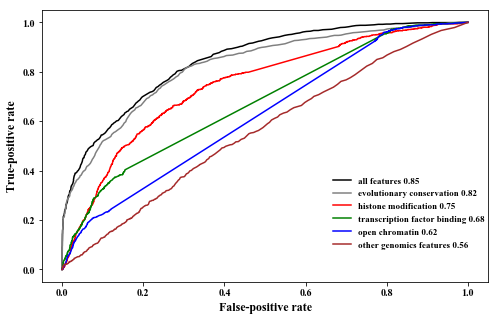

In [3]:
plt.figure(figsize = (8,5))
plt.plot(allfpr,alltpr,"black",label="all features %.2f"%AUC_all)
plt.plot(conservationfpr,conservationtpr,"gray",label="evolutionary conservation %.2f"%AUC_cons)
plt.plot(histoneMofpr,histoneMotpr,"red",label="histone modification %.2f"%AUC_histone)
plt.plot(TFfpr,TFtpr,"green",label="transcription factor binding %.2f"%AUC_TF)
plt.plot(openChromfpr,openChromtpr,"blue",label="open chromatin %.2f"%AUC_openChrom)
plt.plot(otherfpr,othertpr,"brown",label="other genomics features %.2f"%AUC_other)
plt.legend(bbox_to_anchor=(1.0,0.4), loc=1, prop={'family' : 'Times New Roman', 'size'   : 9}, borderaxespad=0.,frameon=False)
plt.xlabel("False-positive rate",  fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.ylabel("True-positive rate",  fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.yticks(fontproperties = 'Times New Roman', size = 10)
plt.xticks(fontproperties = 'Times New Roman', size = 10)
plt.show()